# Inaugural Project

***Group members:***
- Nicholas Stampe Meier (KFM411)
- Kaya Maria Friis Jensen (XCL313)
- Oliver Nyrop Weeks (VSN684)

# Preamble
Imports and set magics:

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# autoreload modules 
%load_ext autoreload
%autoreload 2


# Questions

## Question 1
Start by solving the model as already coded, thus meaning solving the discrete model with $\sigma = 1$. Just to get an overview of what output looks like for the method `solve_discrete`:

In [6]:
model = oliver.HouseholdSpecializationModelClass()
optimal_choices = model.solve_discrete(do_print=True)

LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000


One can see the solutions to the different values of sigma and alpha:

Optimal choices:
LM = 4.50, HM = 4.50, LF = 4.50, HF = 4.50


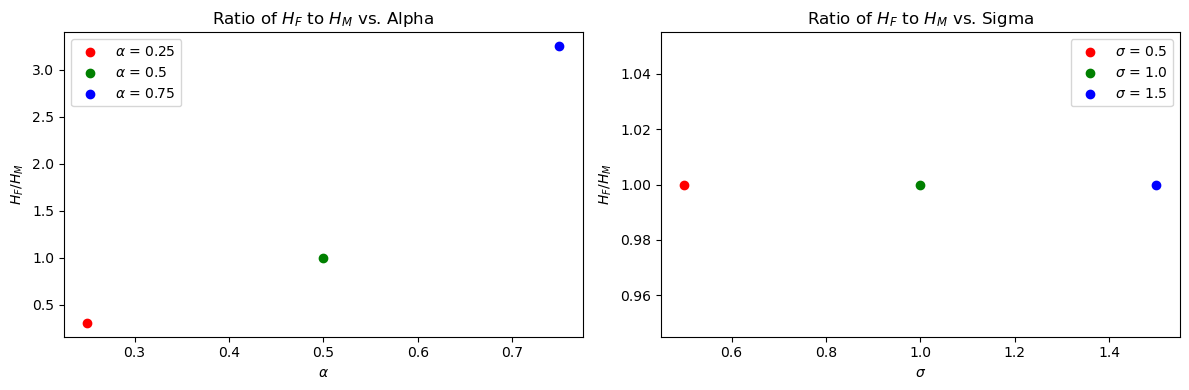

In [7]:
import oliver
# create an instance of the model class
model = oliver.HouseholdSpecializationModelClass()

# solve the model for the default parameters
model.par.alpha = 0.5
model.par.sigma = 1.0
opt = model.solve_discrete()

# print the results
print("Optimal choices:")
print(f"LM = {opt.LM:.2f}, HM = {opt.HM:.2f}, LF = {opt.LF:.2f}, HF = {opt.HF:.2f}")

# plot H_F/H_M vs alpha
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axs[0]
alphas = [0.25, 0.5, 0.75]
colors = ['red', 'green', 'blue']

for i, alpha in enumerate(alphas):
    model.par.alpha = alpha
    model.par.sigma = 1.0
    opt = model.solve_discrete()
    ax.scatter(alpha, opt.HF/opt.HM, label=r'$\alpha$ = {}'.format(alpha), color=colors[i])

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$H_F / H_M$')
ax.set_title('Ratio of $H_F$ to $H_M$ vs. Alpha')
ax.legend()

# plot H_F/H_M vs sigma
ax = axs[1]
sigmas = [0.5, 1.0, 1.5]
colors = ['red', 'green', 'blue']

for i, sigma in enumerate(sigmas):
    model.par.sigma = sigma
    model.par.alpha = 0.5
    opt = model.solve_discrete()
    ax.scatter(sigma, opt.HF/opt.HM, label=r'$\sigma$ = {}'.format(sigma), color=colors[i])

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$H_F / H_M$')
ax.set_title('Ratio of $H_F$ to $H_M$ vs. Sigma')
ax.legend()

# display the plots
plt.tight_layout()
plt.show()

## Question 2

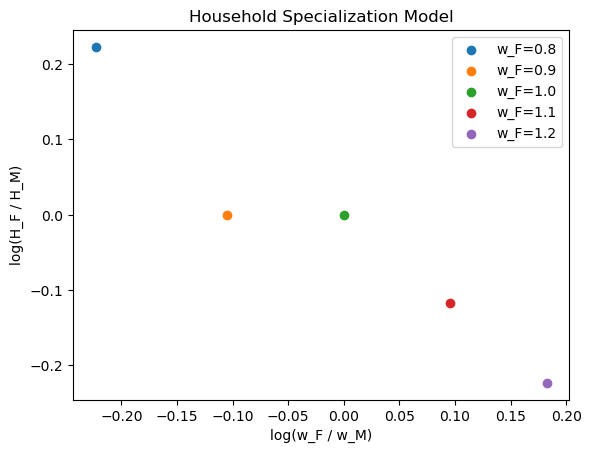

In [10]:
import oliver
# create an instance of the model class
model = oliver.HouseholdSpecializationModelClass()

# set w_M
w_M = model.par.wM

# calculate H_F/H_M for different values of w_F
HF_HM_list = []
log_wf_wm_list = []

for w_F in model.par.wF_vec:
    model.par.wF = w_F
    opt = model.solve_discrete()
    HF_HM_list.append(opt.HF/opt.HM)
    log_wf_wm_list.append(np.log(w_F/w_M))

fig, ax = plt.subplots()
for i in range(len(HF_HM_list)):
    ax.scatter(log_wf_wm_list[i], np.log(HF_HM_list[i]), label=f'w_F={model.par.wF_vec[i]}')
ax.set_xlabel('log(w_F / w_M)')
ax.set_ylabel('log(H_F / H_M)')
ax.set_title('Household Specialization Model')
ax.legend()
plt.show()

## Question 3

In [26]:
import oliver

model_test = oliver.HouseholdSpecializationModelClass()
optimal_choices = model_test.solve(do_print=True)

Bound test:
Bounds for [LM, HM, LF, HF]: [(0, 24), (0, 24), (0, 24), (0, 24)]

[10, 10, 10, 10]
Optimal choices:
LM = 4.4587
HM = 4.4587
LF = 4.4587
HF = 4.4587


Bound test:
Bounds for [LM, HM, LF, HF]: [(0, 24), (0, 24), (0, 24), (0, 24)]

[10, 10, 10, 10]
Optimal choices:
Bound test:
Bounds for [LM, HM, LF, HF]: [(0, 24), (0, 24), (0, 24), (0, 24)]

[10, 10, 10, 10]
Optimal choices:
Bound test:
Bounds for [LM, HM, LF, HF]: [(0, 24), (0, 24), (0, 24), (0, 24)]

[10, 10, 10, 10]
Optimal choices:
Bound test:
Bounds for [LM, HM, LF, HF]: [(0, 24), (0, 24), (0, 24), (0, 24)]

[10, 10, 10, 10]
Optimal choices:
Bound test:
Bounds for [LM, HM, LF, HF]: [(0, 24), (0, 24), (0, 24), (0, 24)]

[10, 10, 10, 10]
Optimal choices:


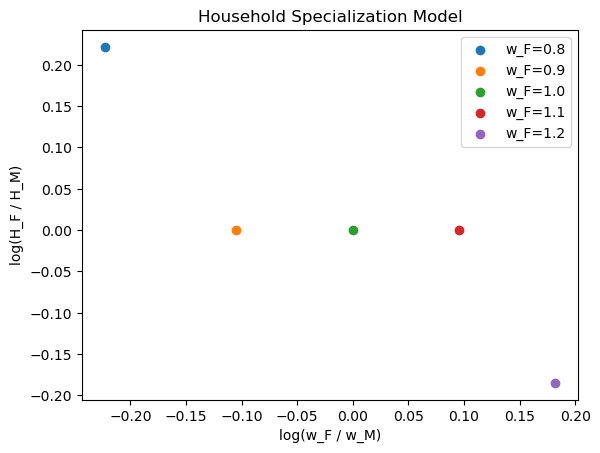

In [27]:
import oliver
# create an instance of the model class
model = oliver.HouseholdSpecializationModelClass()

# set w_M
w_M = model.par.wM

# calculate H_F/H_M for different values of w_F
HF_HM_list = []
log_wf_wm_list = []

for w_F in model.par.wF_vec:
    model.par.wF = w_F
    opt = model.solve()
    HF_HM_list.append(opt.HF/opt.HM)
    log_wf_wm_list.append(np.log(w_F/w_M))

fig, ax = plt.subplots()
for i in range(len(HF_HM_list)):
    ax.scatter(log_wf_wm_list[i], np.log(HF_HM_list[i]), label=f'w_F={model.par.wF_vec[i]}')
ax.set_xlabel('log(w_F / w_M)')
ax.set_ylabel('log(H_F / H_M)')
ax.set_title('Household Specialization Model')
ax.legend()
plt.show()